In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Loading Data

In [16]:
# Folder path
path =  "./data/"

# Which values are considered NaN
na_vls = ['#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', 
               '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 
                'null', '...']

# Load datasets
df_inadimplencia = pd.read_csv(path+"bcdata.sgs.21082.csv", sep = ";")

# Handling missing values
df_inadimplencia.dropna(inplace=True, how = 'all')
df_inadimplencia.fillna(value = 0, inplace=True)

# Register DataFrame Shape
indpl_cols, indpl_rows = df_inadimplencia.shape

indpl_types = {'data': 'str',
            'valor':  'str'}

# Casting DataFrames columns according to the types above
df_inadimplencia = df_inadimplencia.astype(indpl_types)

df_inadimplencia['valor'] = df_inadimplencia['valor'].str.replace(',','.')
indpl_types = {'data': 'str',
            'valor':  'float64'}
df_inadimplencia = df_inadimplencia.astype(indpl_types)

# Transforming 'data' column in a Pandas datetype time series
df_inadimplencia['data']  = pd.to_datetime(df_inadimplencia['data'], dayfirst=True)

#df_inadimplencia['data'] = df_inadimplencia['data'].dt.strftime('%m-%Y')
#df_inadimplencia['data'] = df_inadimplencia['data'].apply(lambda x: x.toordinal())

# Split data into features (X) and target (y)
x = df_inadimplencia['data']
y = df_inadimplencia['valor']


# Create ACF and PACF plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))

# Plot the time series data
ax1.plot(x, y, label='Time Series Data', color='blue')
ax1.set_title('Time Series Data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.grid()

# Create ACF and PACF plots
plot_acf(y.values, lags=40, ax=ax2)
plot_pacf(y.values, lags=40, ax=ax3)

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './data/bcdata.sgs.21082.csv'

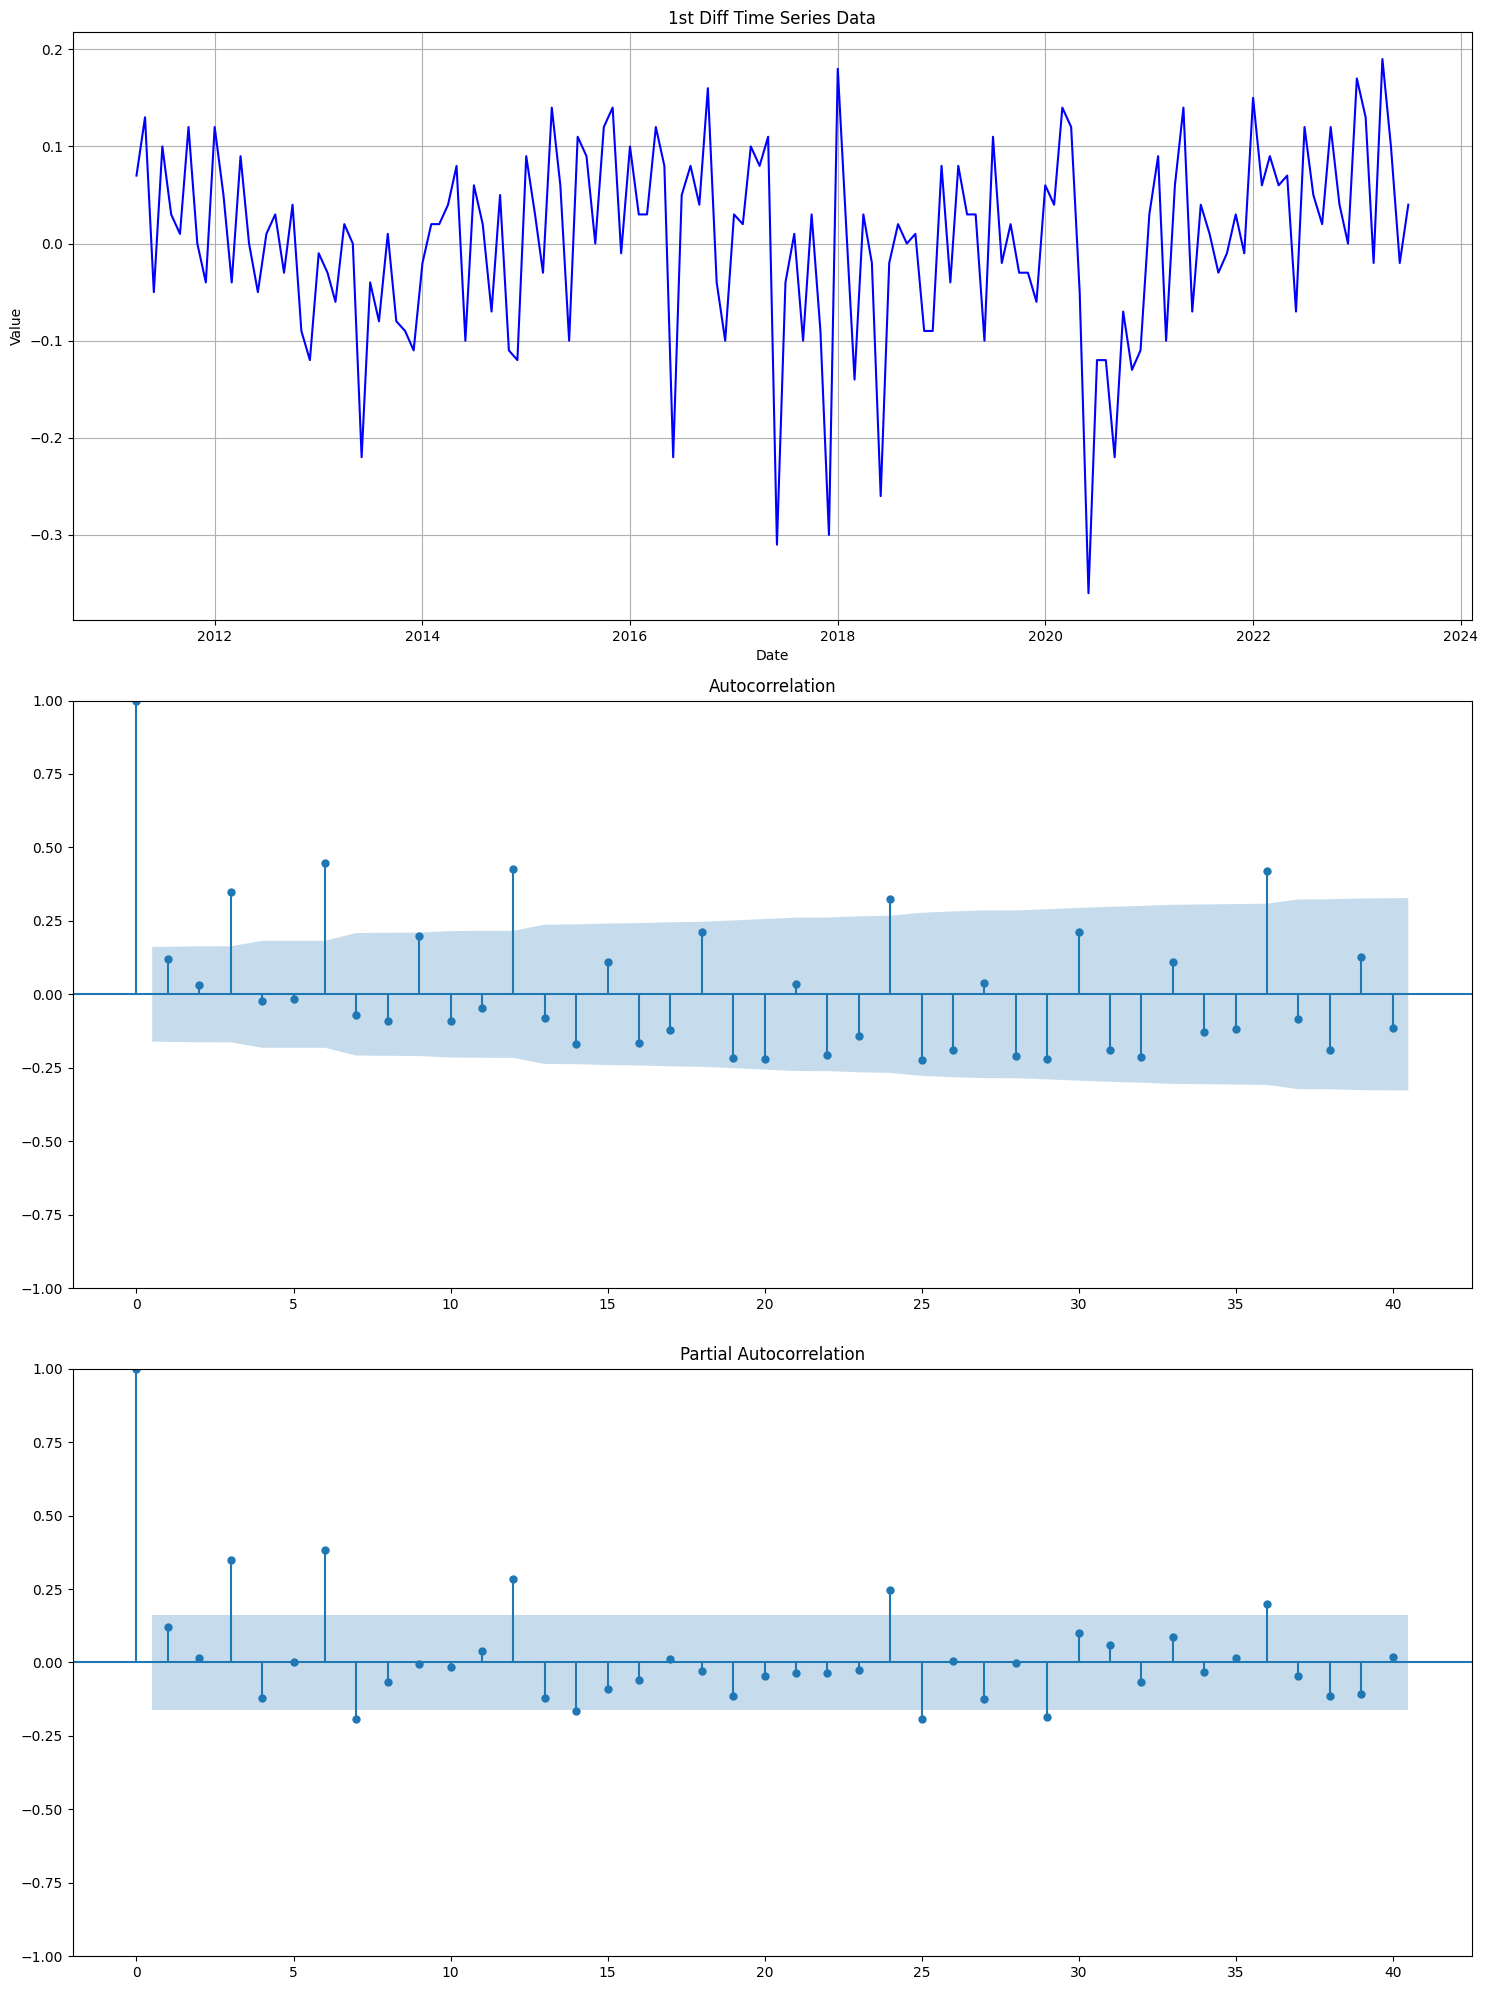

In [ ]:
# Create ACF and PACF plots of 1st diff

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))

# Plot the time series data
ax1.plot(x[1:], y.diff().dropna().values, label='Time Series Data', color='blue')
ax1.set_title('1st Diff Time Series Data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.grid()

# Create ACF and PACF plots
plot_acf(y.diff().dropna().values, lags=40, ax=ax2)
plot_pacf(y.diff().dropna().values, lags=40, ax=ax3)

plt.tight_layout()
plt.show()


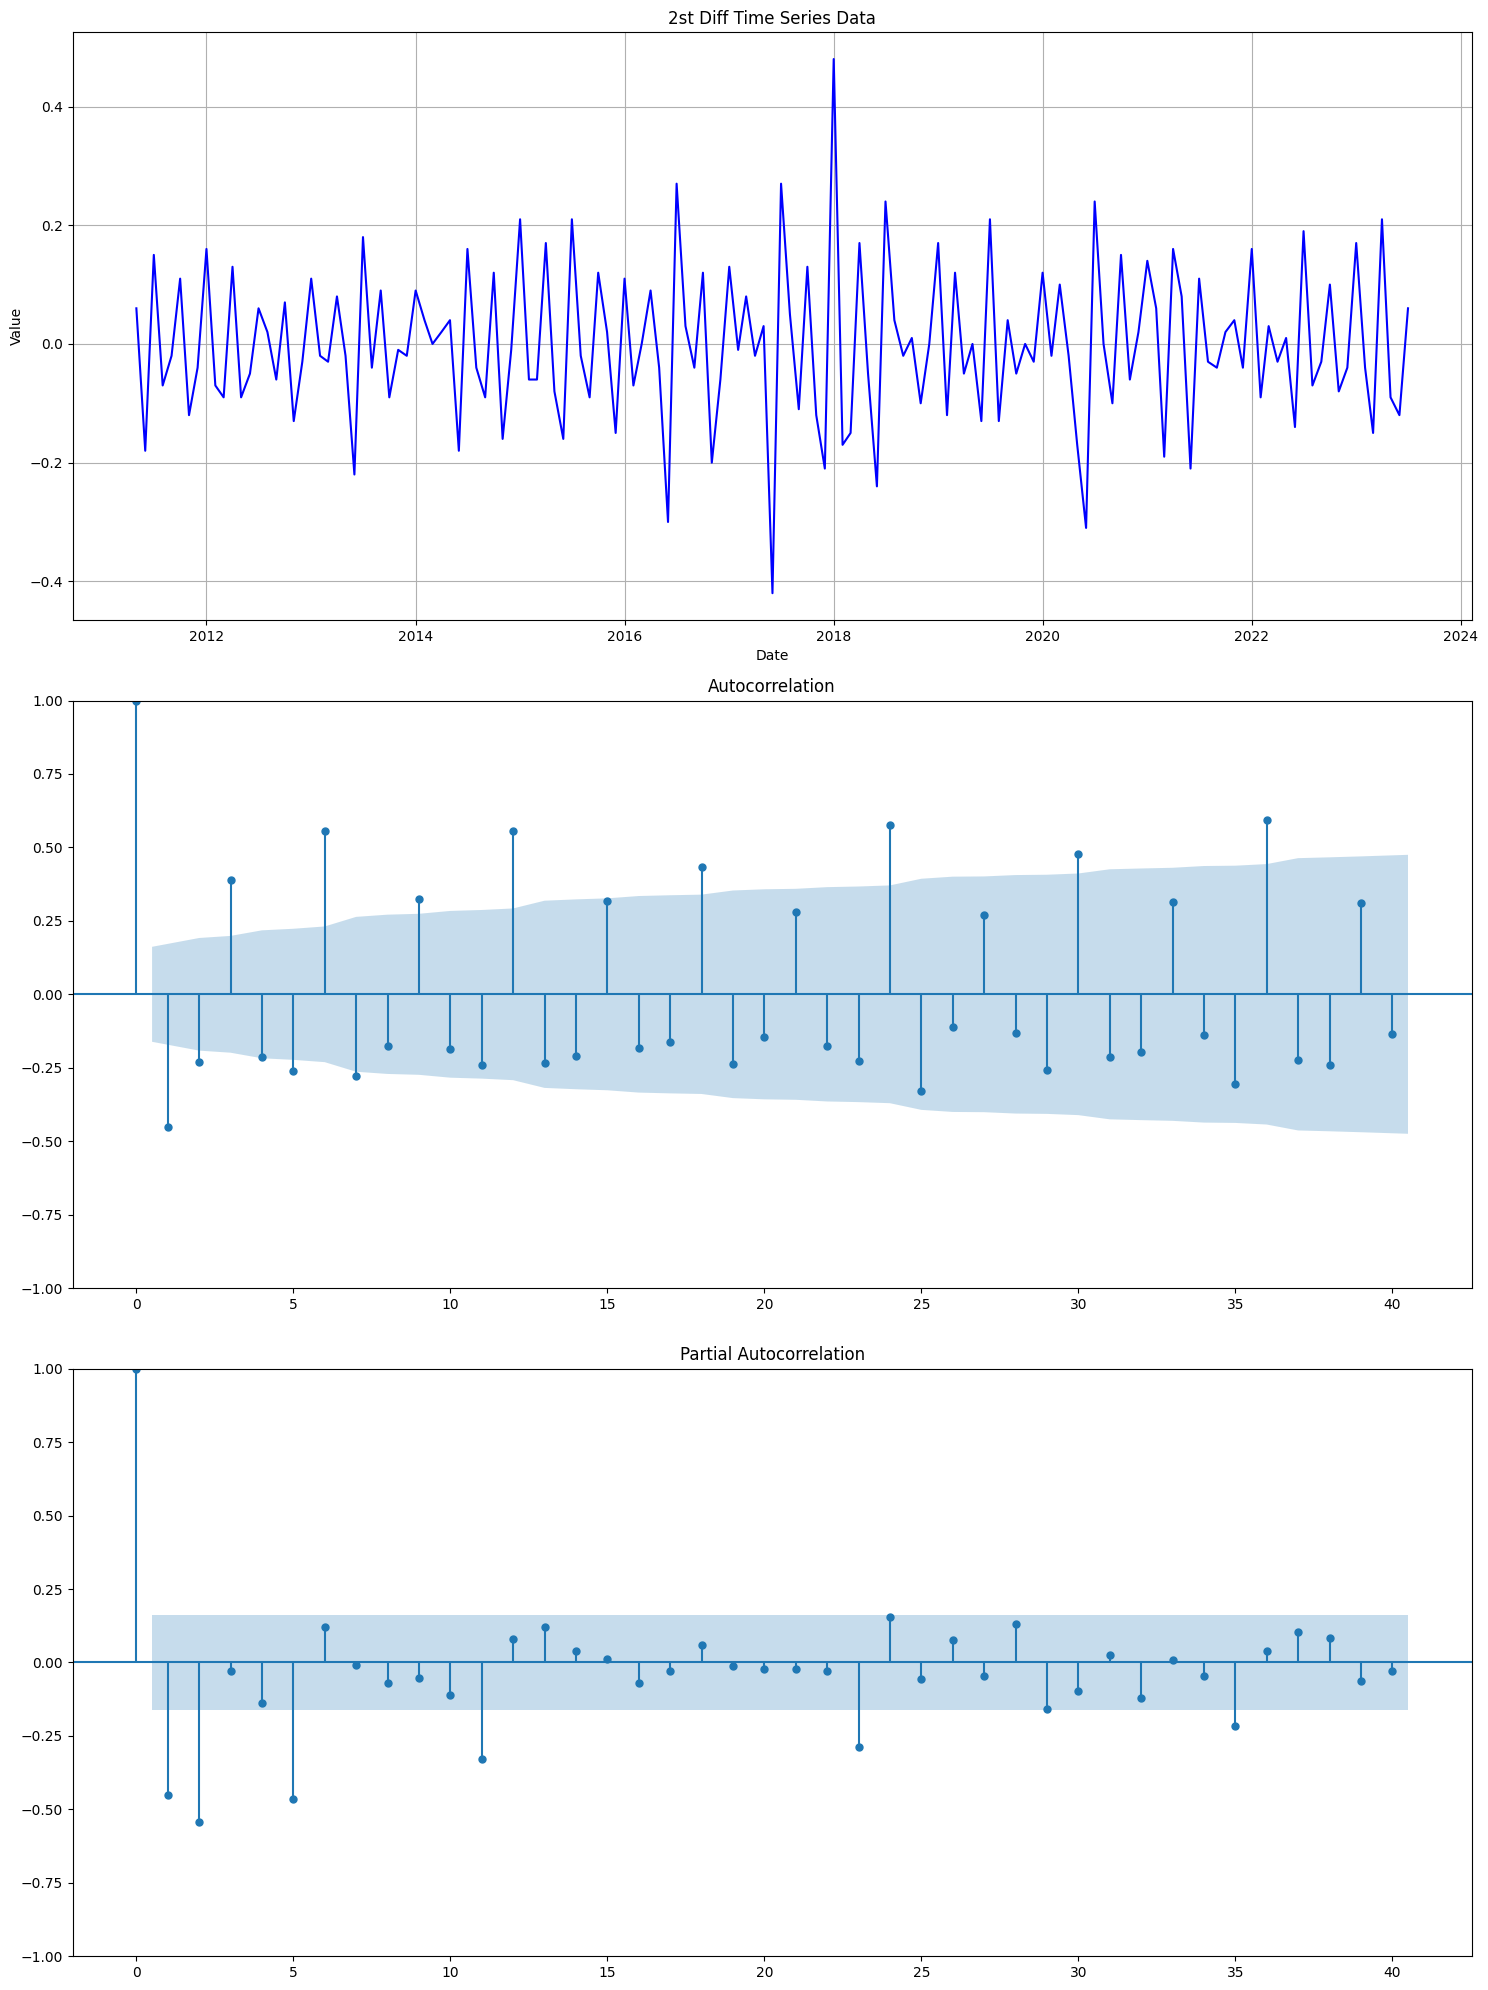

In [ ]:
# Create ACF and PACF plots of 2st diff

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))

# Plot the time series data
ax1.plot(x[2:], y.diff().diff().dropna().values, label='Time Series Data', color='blue')
ax1.set_title('2st Diff Time Series Data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.grid()

# Create ACF and PACF plots
plot_acf(y.diff().diff().dropna().values, lags=40, ax=ax2)
plot_pacf(y.diff().diff().dropna().values, lags=40, ax=ax3)

plt.tight_layout()
plt.show()

### AutoRegressive Moving Average

In [ ]:
# ARIMA parameters based on autocorr and partial autocorr observed
p = 1      # --> autoregressive models: AR(p)
q = 1      # --> moving average models: MA(q)
d = 1

model = ARIMA(y, order=(p, d, q)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  149
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 138.440
Date:                Thu, 21 Sep 2023   AIC                           -270.880
Time:                        17:19:37   BIC                           -261.888
Sample:                             0   HQIC                          -267.226
                                - 149                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8879      0.131      6.785      0.000       0.631       1.144
ma.L1         -0.7790      0.171     -4.544      0.000      -1.115      -0.443
sigma2         0.0090      0.001     11.738      0.000       0.008       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                55.69
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                            -1.02
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

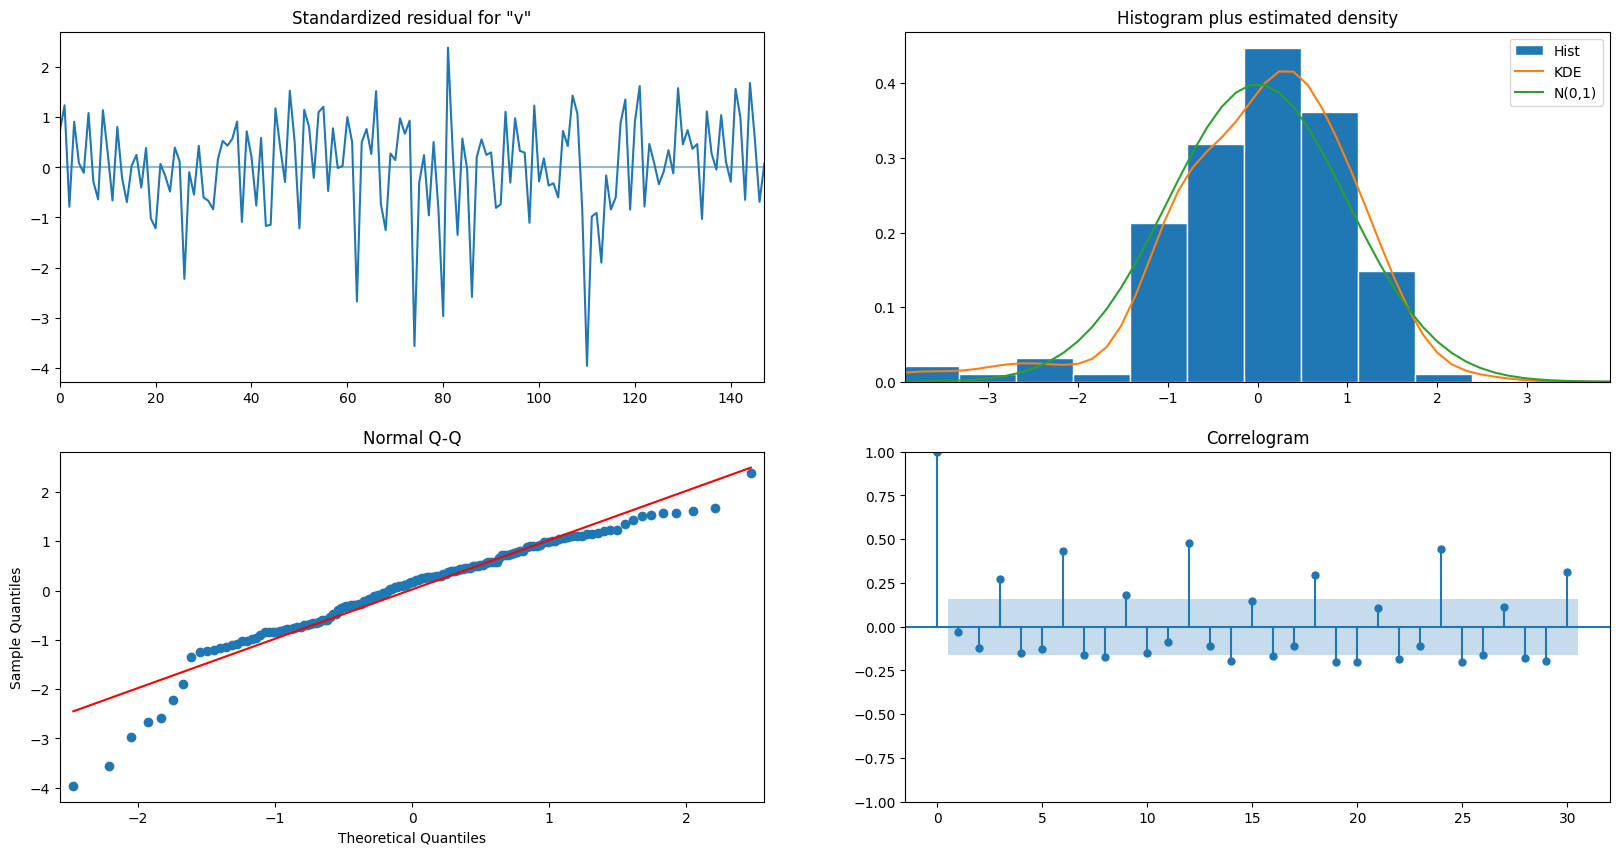

In [ ]:

figure = plt.figure(figsize=(20, 10))
figure = model.plot_diagnostics(fig=figure, lags=30)
plt.show()

C:\Users\luiza\AppData\Local\Temp\ipykernel_9288\773897613.py:8: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, closed='right')


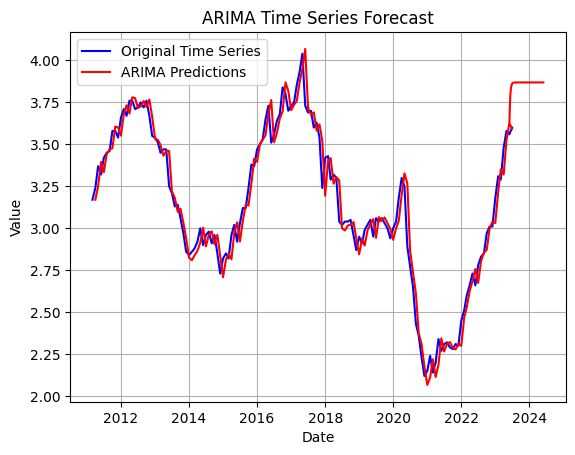

In [ ]:
# Make predictions for a certain number of future periods
forecast_steps = 365
forecast = model.forecast(steps=forecast_steps)
predictions = model.predict(typ='levels')

# Create a date range for the forecasted periods
last_date = df_inadimplencia.iloc[-2]['data']
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, closed='right')


plt.plot(x,y, label='Original Time Series', color='blue')

# Plot the ARIMA predictions
plt.plot(x[1:], predictions[1:], label='ARIMA Predictions', color='red')
plt.plot(forecast_dates, forecast, color='red')

# Customize the plot
plt.title('ARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Show the plot
plt.show()

### References

https://people.duke.edu/~rnau/411arim.htm

https://www.statsmodels.org/stable/tsa.html#autoregressive-moving-average-processes-arma-and-kalman-filter

In [1]:
!apt install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

'apt' is not recognized as an internal or external command,
operable program or batch file.


  Using cached pypandoc-1.11-py3-none-any.whl (20 kB)



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!cp "Case4Intelligence_inadimplencia.ipynb" ./
!jupyter nbconvert --to PDF "Case4Intelligence_inadimplencia.ipynb"
!cp "Case4Intelligence_inadimplencia.ipynb" "./pdf_of_notebooks"

'cp' is not recognized as an internal or external command,
operable program or batch file.
[NbConvertApp] Converting notebook Case4Intelligence_inadimplencia.ipynb to PDF
[NbConvertApp] ERROR | Error while converting 'Case4Intelligence_inadimplencia.ipynb'
Traceback (most recent call last):
  File "C:\Users\luiza\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 435, in export_single_notebook
    output, resources = self.exporter.from_filename(notebook_filename, resources=resources)
  File "C:\Users\luiza\anaconda3\lib\site-packages\nbconvert\exporters\exporter.py", line 190, in from_filename
    return self.from_file(f, resources=resources, **kw)
  File "C:\Users\luiza\anaconda3\lib\site-packages\nbconvert\exporters\exporter.py", line 208, in from_file
    return self.from_notebook_node(nbformat.read(file_stream, as_version=4), resources=resources, **kw)
  File "C:\Users\luiza\anaconda3\lib\site-packages\nbconvert\exporters\pdf.py", line 168, in from_notebook_node
    latex